<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mobile-game-app-project" data-toc-modified-id="Mobile-game-app-project-1">Mobile game app project</a></span><ul class="toc-item"><li><span><a href="#1.-Importing-and-inspecting-data" data-toc-modified-id="1.-Importing-and-inspecting-data-1.1">1. Importing and inspecting data</a></span></li><li><span><a href="#2.-EDA" data-toc-modified-id="2.-EDA-1.2">2. EDA</a></span><ul class="toc-item"><li><span><a href="#What-types-of-events-do-we-have-in-game?" data-toc-modified-id="What-types-of-events-do-we-have-in-game?-1.2.1">What types of events do we have in game?</a></span></li><li><span><a href="#What-types-of-buildings-do-we-have-in-game?" data-toc-modified-id="What-types-of-buildings-do-we-have-in-game?-1.2.2">What types of buildings do we have in game?</a></span></li><li><span><a href="#Timing" data-toc-modified-id="Timing-1.2.3">Timing</a></span></li><li><span><a href="#Traffic-sources" data-toc-modified-id="Traffic-sources-1.2.4">Traffic sources</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.2.5">Summary</a></span></li></ul></li><li><span><a href="#3.-Game-Strategies" data-toc-modified-id="3.-Game-Strategies-1.3">3. Game Strategies</a></span><ul class="toc-item"><li><span><a href="#How-does-traffic-source-affect-users'-strategy-choice?" data-toc-modified-id="How-does-traffic-source-affect-users'-strategy-choice?-1.3.1">How does traffic source affect users' strategy choice?</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.3.2">Summary</a></span></li></ul></li><li><span><a href="#4.-Statistical-Hypothesis-Testing" data-toc-modified-id="4.-Statistical-Hypothesis-Testing-1.4">4. Statistical Hypothesis Testing</a></span><ul class="toc-item"><li><span><a href="#Hypothesis-1" data-toc-modified-id="Hypothesis-1-1.4.1">Hypothesis 1</a></span></li><li><span><a href="#Hypothesis-2" data-toc-modified-id="Hypothesis-2-1.4.2">Hypothesis 2</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.4.3">Summary</a></span></li></ul></li><li><span><a href="#5.-Marketing-Metrics" data-toc-modified-id="5.-Marketing-Metrics-1.5">5. Marketing Metrics</a></span><ul class="toc-item"><li><span><a href="#CAC" data-toc-modified-id="CAC-1.5.1">CAC</a></span></li><li><span><a href="#Retention-Rate" data-toc-modified-id="Retention-Rate-1.5.2">Retention Rate</a></span></li><li><span><a href="#Monetization-Models" data-toc-modified-id="Monetization-Models-1.5.3">Monetization Models</a></span></li><li><span><a href="#Calculate-LTV" data-toc-modified-id="Calculate-LTV-1.5.4">Calculate LTV</a></span></li><li><span><a href="#Let’s-try-to-optimize-CAC" data-toc-modified-id="Let’s-try-to-optimize-CAC-1.5.5">Let’s try to optimize CAC</a></span></li></ul></li><li><span><a href="#6.-Conclusions-and-Recommendations" data-toc-modified-id="6.-Conclusions-and-Recommendations-1.6">6. Conclusions and Recommendations</a></span></li><li><span><a href="#7.-Dashboard" data-toc-modified-id="7.-Dashboard-1.7">7. Dashboard</a></span></li></ul></li></ul></div>

# Mobile game app project

## 1. Importing and inspecting data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
from scipy import stats as st

In [2]:
game_actions = pd.read_csv('/datasets/game_actions.csv')
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


In [3]:
ad_costs = pd.read_csv('/datasets/ad_costs.csv')
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [4]:
user_source = pd.read_csv('/datasets/user_source.csv')
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB


We have 3 datasets: `game_actions` with the types of events and buildings made by the players, `ad_costs` with information on marketing costs and `user_source` with traffic sources for every user.  

We have not messy data but need to change types of columns and handle some missing values. 

In [5]:
#datetime type
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'], format='%Y-%m-%d %H:%M:%S')
game_actions['event_day'] = game_actions['event_datetime'].dt.date.astype('datetime64')

ad_costs['day'] = pd.to_datetime(ad_costs['day'], format='%Y-%m-%d')

#missing values
game_actions['project_type'] = game_actions['project_type'].fillna('none')

Duplicates check.

In [6]:
ad_costs.duplicated().sum()
user_source.duplicated().sum() 
game_actions.duplicated().sum()

1

In [7]:
game_actions = game_actions.drop_duplicates()

And now after we preprocessed data let's look at dataframes. 

In [8]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,event_day
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,none,2020-05-04
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,none,2020-05-04
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,none,2020-05-04
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,none,2020-05-04
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,none,2020-05-04


In [9]:
user_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [10]:
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


## 2. EDA

### What types of events do we have in game? 

In [11]:
game_actions['event'].unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

There are 3 types of events: `building`, `finished_stage_1`, `project`, and `finished_stage_1` is a target one. Let's look at how they are distributed.

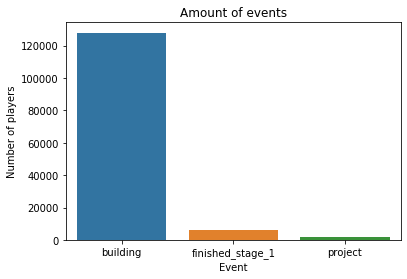

In [12]:
sns.set_style()
sns.countplot(game_actions['event'])
plt.title('Amount of events')
plt.ylabel('Number of players')
plt.xlabel('Event')
plt.show()

There is a huge difference in amount of buildings and number of stage 1 finished. Let's look at it from unique users prospective.

In [13]:
#pivoting 
events_pivot = game_actions.pivot_table(index='event', 
                                  values='user_id', 
                                  aggfunc = {'nunique', 'count'})

#those who made action/event
events_pivot['% of total users'] = (events_pivot['nunique'] / game_actions['user_id'].nunique()).round(2)

#average amount of events
events_pivot['avg_per_user'] = (events_pivot['count'] / events_pivot['nunique']).round(2)

events_pivot

,count,nunique,% of total users,avg_per_user
event,,,,
building,127956,13576,1.00,9.43
finished_stage_1,5817,5817,0.43,1.00
project,1866,1866,0.14,1.00


We see here that more than a half of unique players (57%) did not finish 1st stage (our target action). 

### What types of buildings do we have in game? 

In [14]:
game_actions['building_type'].unique()

array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

We have 3 types of buildings: `assembly_shop`, `spaceport`, `research_center`. Let's look at how they are distributed.

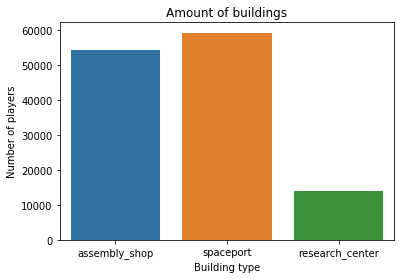

In [15]:
sns.set_style()
sns.countplot(game_actions['building_type'])
plt.title('Amount of buildings')
plt.ylabel('Number of players')
plt.xlabel('Building type')
plt.show()

Most popular are spaceports and assembly shops. Let's look at it from unique users prospective.

In [16]:
#pivoting
buildings_pivot = game_actions.pivot_table(index='building_type', 
                                  values='user_id', 
                                  aggfunc = {'nunique', 'count'})

#users who made buildings
buildings_pivot['% of total users'] = (buildings_pivot['nunique'] / game_actions['user_id'].nunique()).round(2)

#average amount of buildings
buildings_pivot['avg_per_user'] = (buildings_pivot['count'] / buildings_pivot['nunique']).round(2)

buildings_pivot

,count,nunique,% of total users,avg_per_user
building_type,,,,
assembly_shop,54494,13576,1.00,4.01
research_center,14137,7671,0.57,1.84
spaceport,59325,13231,0.97,4.48


We see that all users built `assembly_shop`. It could be the simplest building to start with. 97% of users built`spaceport` and about 57% - `research_center`.

### Timing 

We can also study how events are distributed over time.

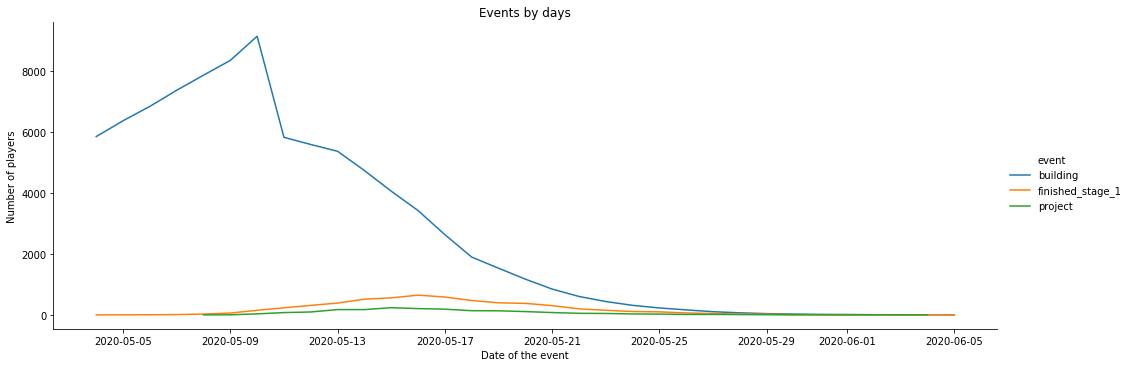

In [17]:
events_by_days = game_actions.groupby(['event_day', 'event'])['user_id'].nunique().reset_index()

sns.relplot(data=events_by_days, x='event_day', y='user_id', hue='event', kind='line', aspect=17/6)
plt.title('Events by days')
plt.ylabel('Number of players')
plt.xlabel('Date of the event')
plt.show()

We have a peak in construction of buildings which falls sharply, and then steadily decreases. Let's check what could be a good reason for it. 

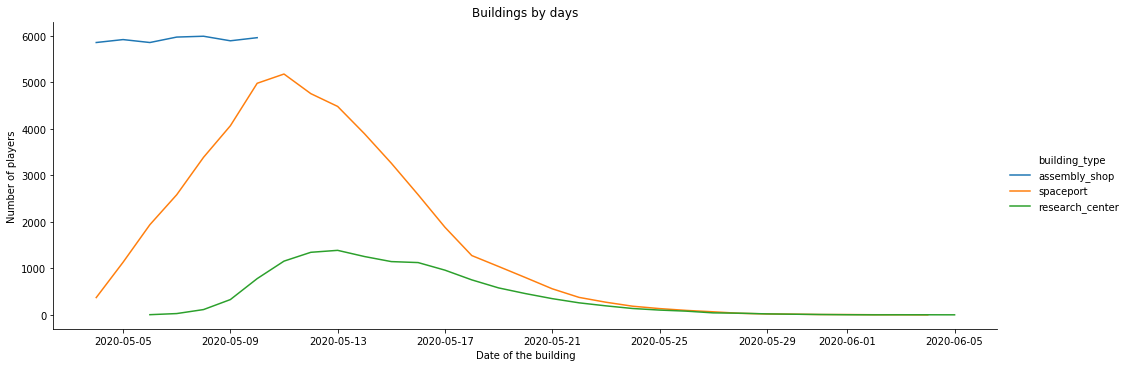

In [18]:
buildings_by_days = game_actions.groupby(['event_day', 'building_type'])['user_id'].nunique().reset_index()

sns.relplot(data=buildings_by_days, x='event_day', y='user_id', hue='building_type', kind='line', aspect=17/6)
plt.title('Buildings by days')
plt.ylabel('Number of players')
plt.xlabel('Date of the building')
plt.show()

Chart shows that a lot of assembly shops were built during the first days. Then users move on to other buildings or quit the game.

### Traffic sources

Now we can look at the traffic. We have data from the first users of the app who started playing during the period May 4 - May 10. Let's add traffic sources to it and see how many users came from which channel per day.

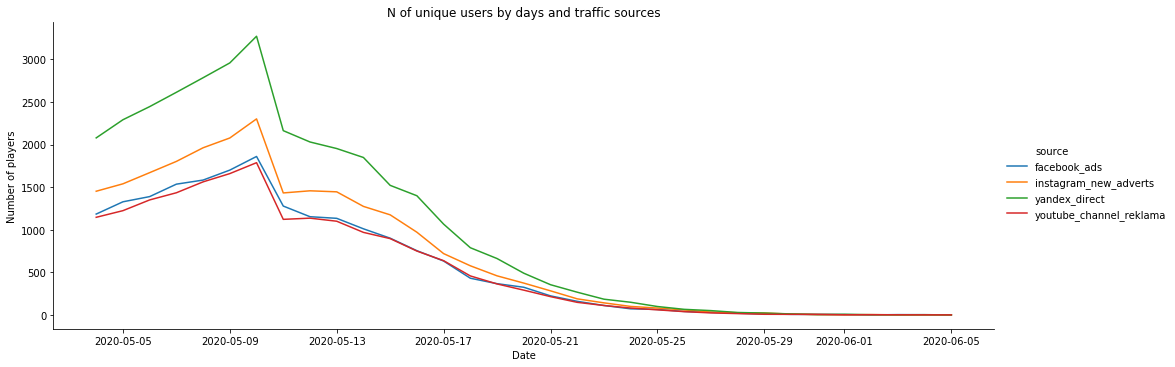

In [19]:
#merging 2 datasets
game_actions_and_source = game_actions.merge(user_source, how='left', on='user_id')

#grouping unique users by days and sources
users_by_sources = game_actions_and_source.groupby(['event_day', 'source'])['user_id'].nunique().reset_index()

#chart
sns.relplot(data=users_by_sources, x='event_day', y='user_id', hue='source', kind='line', aspect=17/6)
plt.title('N of unique users by days and traffic sources')
plt.ylabel('Number of players')
plt.xlabel('Date')
plt.show()

We have peak here of newy generated users similar to the peak of the buildings constructed. That is, all new users come and build an assembly shop. Then traffic drops sharply just at the end of the promotion period and gradually decreases by the end of the studied period. The largest number of users was attracted via Yandex. Direct channel. Facebook Instagram and Youtube ads are next. Let's calculate the effectiveness of different advertising channels.

### Summary

After EDA we came to the following conclusions: 
- users were attracted via 4 traffic channels through period May, 4 - May,10 
- only 43% of players did target action (finished 1st stage of the mobile game), 1/3 of them made it to the next stage after finishing a project and 2/3 of them made it after fighting an enemy
- on average there are about 9 buildings per user
- all users built assembly shop, 97% of users - spaceport, approximately 57% - research center
- after the end of the advertising campaign user traffic drops sharply
- the largest number of users in was attracted through Yandex.Direct.

## 3. Game Strategies

Let's dive into what strategies are used by users in game. For this we need to understand approximate sequence of events.

In [20]:
#dataframe grouped by first user event 
first_event = game_actions.groupby('user_id')['event_datetime'].min().reset_index()

#dataframe grouped by last user event 
last_event = game_actions.groupby('user_id')['event_datetime'].max().reset_index()

#merging with main dataframe
df1 = first_event.merge(game_actions, on=['user_id', 'event_datetime'], how='left')
df1 = df1.drop(['project_type', 'event_day', 'event', 'building_type'], axis=1)

#merging with main dataframe
df2 = last_event.merge(game_actions, on=['user_id', 'event_datetime'], how='left')
df2.columns = ['user_id', 'last_event_date', 'event', 'building_type', 'project_type', 'event_day']
df2 = df2.drop(['project_type', 'event_day'], axis=1)

#merging 2 dataframes
df = df1.merge(df2, on=['user_id'], how='left')

#making dataframe with projects 
df_projects = (game_actions
               .drop(['event_datetime', 'event', 'building_type', 'event_day'], axis=1)
               .query('project_type != "none"')
              )

#merging 2 dataframes
df_final = df.merge(df_projects, on=['user_id'], how='left')

#filling n/a
df_final['project_type'] = df_final['project_type'].fillna('none')

Now let's calculate the days spent by each user on finishing stage 1 in the game. 

In [21]:
#calculation of time
df_final['till_stage_1'] = df_final['last_event_date'] - df_final['event_datetime']

#transforming into days
df_final['time_stage_1'] = df_final['till_stage_1'].dt.days

df_final.head()

,user_id,event_datetime,last_event_date,event,building_type,project_type,till_stage_1,time_stage_1
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,building,research_center,none,14 days 10:18:29,14
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,building,spaceport,none,12 days 07:37:40,12
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,building,spaceport,none,8 days 15:12:35,8
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,finished_stage_1,NaN,none,6 days 10:38:42,6
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,2020-05-22 02:46:45,building,spaceport,none,16 days 12:56:47,16


In [22]:
df_final.describe()

,till_stage_1,time_stage_1
count,13576,13576.000000
mean,10 days 16:13:07.579183,10.175309
std,4 days 08:24:40.691989,4.356852
min,0 days 00:00:00,0.000000
25%,7 days 16:33:38.750000,7.000000
50%,10 days 12:30:52.500000,10.000000
75%,13 days 07:28:52,13.000000
max,30 days 21:58:53,30.000000


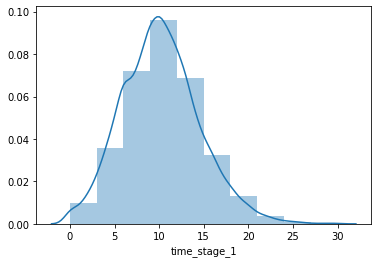

In [23]:
sns.distplot(df_final['time_stage_1'], bins=10)
plt.show()

Average time spent on the game is **10 days**. Now let's analyze queries of users depending on target action (those who didn't finish game, those who did by fighting the enemy and those who did by building the project). 

In [24]:
#making queries

finished_through_project = df_final.query('project_type != "none"')

finished_through_win = df_final.query('project_type == "none" and event == "finished_stage_1"')

not_finished = df_final.query('event != "finished_stage_1"')

print('Share of users who finished stage 1 through project', len(finished_through_project) / len(df_final) *100)
print('Share of users who finished stage 1 through winning the fight with the enemy', len(finished_through_win) / len(df_final) *100)
print('Share of users who quitted the game', len(not_finished) / len(df_final) *100)

Share of users who finished stage 1 through project 13.744843842074248
Share of users who finished stage 1 through winning the fight with the enemy 29.10282852091927
Share of users who quitted the game 57.152327637006486


It seems that we found two main strategies for users. Let's look if it is explained by time taken to fulfil each strategy.

In [25]:
print('Avg days to finish through project', finished_through_project['time_stage_1'].mean())
print('Avg days to finish through winning', finished_through_win['time_stage_1'].mean())
print('Avg days before quitting', not_finished['time_stage_1'].mean())

Avg days to finish through project 12.963022508038586
Avg days to finish through winning 10.606175651733738
Avg days before quitting 9.28547493233664


Here we see 2 main strategies:
- Finish stage 1 through building project - it takes about 13 days on average. 
- Finish stage 1 through winning the fight against the enemy - it takes 10 days on everage. 

The second strategy is faster - that is why it is more popular than the other one (29% users vs. 13.7% users).

### How does traffic source affect users' strategy choice? 

In [26]:
#merging final dataframe with dataframe on sources
df_final_sources = df_final.merge(user_source, on='user_id', how='left')

#grouping users by sources
finished_by_sources = (df_final_sources
               .query('event == "finished_stage_1"')
               .groupby('source')['user_id'].count()
               .reset_index()
)

finished_by_sources.columns = ['source', 'finished_users']

attracted = game_actions_and_source.groupby('source')['user_id'].nunique().reset_index()
attracted.columns = ['source', 'all_users']

results_by_source = attracted.merge(finished_by_sources, on=['source'], how='left')

results_by_source['% of successful'] = results_by_source['finished_users'] / results_by_source['all_users'] *100

results_by_source

,source,all_users,finished_users,% of successful
0,facebook_ads,2726,1150,42.186354
1,instagram_new_adverts,3347,1466,43.800418
2,yandex_direct,4817,2042,42.391530
3,youtube_channel_reklama,2686,1159,43.149665


Shares of users who made target action (finished stage 1) are approximately equal for all traffic sources. We will further test this hypothesis statictically. If the quality of traffic is equal (that is the same number of users finishes stage 1) we can spend our marketing budget on cheaper traffic sources. 

### Summary

- average time spent on the game is 10 days
- 13.7% of players finished stage 1 of the game through project, 29.1% finished through the winning over the enemy, the remaining 57% of users did not complete the level
- on average it takes 13 days to complete the level through the project, 10 days to complete the level through the victory
- users who did not finish srage 1 spent 9.2 days on the game
- users easily pass the construction of the assembly shop but most often quit the game at the construction stage of spaceport (apparently, this is the simplest and the most complex constructions)
- 2 game strategies are mapped: (1) play slower setting up the project, (2) play faster till you defeat the enemy.

## 4. Statistical Hypothesis Testing

### Hypothesis 1

We found out that users spend an average of 13 days on the first strategy and 10 days on the second. Let's check that there is a statistical significance of the difference between two average values. When we test the hypothesis about the difference of two general populations means, and at the same time we believe that we have a normal distribution, we use `Student's t-test`.

- Null hypothesis: `There is no statistically significant difference between average time of level complete for  "project" strategy and the "defeating the enemy" strategy`
- Alternative hypothesis: `There is statistically significant difference between average time of level complete for  "project" strategy and the "defeating the enemy" strategy`

In [27]:
alpha = 0.05

results = st.ttest_ind(finished_through_project['time_stage_1'], 
                       finished_through_win['time_stage_1'], 
                       equal_var = False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Reject null hypothesis, there is statistically significant difference")
else:
    print("Failing to reject null hypothesis, there is no statistically significant difference")


p-value:  2.6237027268062713e-106
Reject null hypothesis, there is statistically significant difference


### Hypothesis 2

The second hypothesis will be about the difference between two proportions. Since we assume that our distribution is normal, we will use the `z-test` method to test the hypothesis. We will check the fifference between each two traffic sources:
- Facebook & Instagram
- Facebook & Yandex.Direct
- Facebook & Youtube
- Instagram & Yandex.Direct
- Instagram & Youtube
- Yandex.Direct & Youtube. 

As we have 6 pairs of proportions we will use Bonferroni correction.

- Null hypothesis: `There is no statistically significant difference between two proportions`
- Alternative hypothesis: `There is statistically significant difference between two proportions`

In [28]:
results_by_source

,source,all_users,finished_users,% of successful
0,facebook_ads,2726,1150,42.186354
1,instagram_new_adverts,3347,1466,43.800418
2,yandex_direct,4817,2042,42.391530
3,youtube_channel_reklama,2686,1159,43.149665


In [29]:
for i in range(0,4): 
    for j in range(i+1, 4):
        alpha = 0.05/6 # significance level with Bonferroni correction

        successes = np.array([results_by_source.loc[i, 'finished_users'],
                              results_by_source.loc[j, 'finished_users']])
        n_users = np.array([results_by_source.loc[i, 'all_users'],
                            results_by_source.loc[j, 'all_users']]) 

        p1 = successes[0]/n_users[0] #success of group 1
        p2 = successes[1]/n_users[1] #success of group 2

        #proportion of successes in combined dataset        
        p_combined = (successes[0] + successes[1]) / (n_users[0] + n_users[1])

        #difference in proportions                    
        difference = p1 - p2 

        #calculating statistics in standard deviations of the standard normal distribution
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/n_users[0] + 1/n_users[1]))

        #setting standard normal distribution (mean 0, standard deviation 1)
        distr = st.norm(0, 1)  

        p_value = (1 - distr.cdf(abs(z_value))) * 2

        print('p-value: ', p_value)

        if p_value < alpha:
            print('Reject null hypothesis, there is statistically significant difference between two proportions')
        else:
            print('Failing to reject null hypothesis, there is no statistically significant difference')

NameError: name 'mth' is not defined

### Summary

We tested 2 statistical hypotheses:
- There is statistically significant difference between average time of level complete for  "project" strategy and the "defeating the enemy" strategy
- There is no statistically significant difference between proportions of users generated through different traffic sources.

## 5. Marketing Metrics

Let's dive into marketing metrics and calculate: 
- The most efficient traffic source (CAC)
- Retention Rate
- When we can recoup our marketing costs? 

### CAC

In [ ]:
#grouping costs by source
costs_by_source = ad_costs.groupby('source')['cost'].sum().sort_values(ascending=False).reset_index() 

print('Overall marketing costs are', costs_by_source['cost'].sum().round(2))

In [ ]:
#counting users by source 
users_by_source = user_source.groupby('source')['user_id'].nunique().sort_values(ascending=False).reset_index() 

#merging dataframes on users and costs
total_ads = costs_by_source.merge(users_by_source, on=['source'], how='left')

#calculating CAC
total_ads['cac'] = (total_ads['cost'] / total_ads['user_id']).round(2)

total_ads

In [ ]:
print('CAC is', (total_ads['cost'].sum() / total_ads['user_id'].sum()).round(2))

We found out that:
- CAC is equal 0.56 per user
- The most efficient traffic sources are Youtube and Yandex.Direct.

### Retention Rate

Let's consider each day of promotion campaign (May, 4 - May, 10) as cohorts and look at RR.

In [ ]:
#finding first action date

first_action_date = game_actions.groupby('user_id')['event_day'].min()
first_action_date.name = 'first_action_date'
evvents = game_actions.join(first_action_date, on='user_id')

#setting cohorts
evvents['cohort_lifetime'] = (
    evvents['event_day'] - evvents['first_action_date']
) 
evvents['cohort_lifetime'] = (evvents['cohort_lifetime'] / np.timedelta64(1, 'W')).round().astype(int)

#pivoting
cohorts = (
    evvents.groupby(['first_action_date', 'cohort_lifetime'])
    .agg({'user_id' : 'nunique'})
).reset_index()

#calculating N of users for cohorts
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_action_date', 'user_id']]
initial_users_count.columns = ['first_action_date', 'cohort_users']

#merging with initial dataframe
cohorts = cohorts.merge(initial_users_count, on='first_action_date')

After identifying cohorts let's calculate Retention Rate.

In [ ]:
cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_users']

#pivoting
retention_pivot = cohorts.pivot_table(
    index='first_action_date',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)

retention_pivot.index = retention_pivot.index.strftime("%D")

And let's look at RR using `heatmap`.

In [ ]:
#heatmap
sns.set(style='white')
plt.figure(figsize=(10, 5))
plt.title('Retention Rate')
sns.heatmap(retention_pivot, 
            annot=True, 
            fmt='.1%', 
            linewidths=1, 
            linecolor='grey', 
            vmax=0.10,
            cmap="summer")
plt.show()

The chart shows that RR decreases by 2 times only from the 2nd week of the cohorts' lifetime. In week 1 most of the users stay and continue to play (remembering that the average play time even when the level is not completed is 9 days).

### Monetization Models

We consider ad-based monetization model where advertiser pays for 1000 impressions (CPM). The goal is to choose optimal time to show ad so LTV>CAC.  

In [ ]:
events_pivot

In [ ]:
#calculating price for one impression
cac = 0.56
avg_build = 9.43
price_per_build = cac / avg_build
display(price_per_build)

In [ ]:
#calculating average number of building per day
avg_build = 9.43
avg_days_of_game = 9.285

avg_days_for_build = avg_build / avg_days_of_game
display(avg_days_for_build)

### Calculate LTV

To recoup CAC we need to earn 0.059 from each building action. Avg world-wide price per 1000 impressions (CPM) is [14.71](https://vc.ru/marketing/265625-analiz-media-zakupok-v-mobilnyh-igrah-po-vsemu-miru-za-pervyy-kvartal-2021-goda-chast-2) (0.015 per impression). The player makes 1 building action per day in average, so we have 2 options: 
1. Show impression once a day (before each building action) for 0.06/impression (4x more expensive than average). Blocker: it’s impossible to sell ad with that price. 
2. Show impressions four times a day for 0.015/impression. In this case we need more target actions  to show impressions (ex: game start, building selection dialog). Risk: frequent ad may create user churn. 

### Let’s try to optimize CAC

Advertising costs and acquisition channels effectiveness tell us that Youtube traffic is much more profitable than Facebook. Hence a non-aggressive way to recoup marketing costs is to redistribute expenses from Facebook to Youtube. 

## 6. Conclusions and Recommendations

There are 2 scenarios for ad-based monetization model:
1. Aggressive: show impressions 4 times a day which will likely create user churn
2. Mild: redistribute expenses toward more effective acquisition channels (Youtube). Lower CAC will allow to recover CAC in a few months. Caveat: this is possible only starting next planning period. 

I also recommend consider other monetization models: 
1. In-app purchases
2. Permanent Ad partner 
3. Premium paid accounts without ads
4. Donates

## 7. Dashboard

- [TABLEAU LINK](https://public.tableau.com/views/DasboardforMobileGame/DashboardSpace)